In [8]:
## CSCI 4150U - Data Mining - Lab 4 (Waveform dataset)
# Name: Thinh Le
# Student ID: 100741899

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import fmean
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time

In [10]:
headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'Class']
data = pd.read_csv('./data2/waveform.data', header=None, index_col=None, names=headers)
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,Class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.65,0.69,2.29,-0.16,0.51,0.26,2.34,-0.42,0.49,0.31,...,3.46,4.81,5.49,5.19,3.10,3.86,2.96,1.09,-1.42,0
4996,-0.02,0.67,2.34,3.18,2.16,4.77,6.70,4.54,4.92,3.39,...,1.53,2.52,1.14,-1.56,-1.18,-0.56,0.02,-1.05,-0.18,1
4997,0.01,-1.99,0.16,2.30,-0.53,1.93,3.61,3.00,4.61,5.73,...,3.14,3.04,1.61,0.60,-0.52,0.62,1.00,1.21,-0.27,1
4998,-0.40,0.41,-0.48,1.04,0.79,-0.66,1.18,0.52,2.20,0.59,...,3.64,3.62,5.97,2.63,3.83,1.72,2.08,1.31,1.37,0


In [11]:
# Normalize the data
class_col = data['Class']
data.drop(columns=['Class'], inplace=True)
cols = data.columns
scaler = MinMaxScaler()
d = scaler.fit_transform(data)
data = pd.DataFrame(d, columns=cols)
data['Class'] = class_col
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,Class
0,0.289835,0.237027,0.274664,0.371220,0.408818,0.479769,0.345199,0.328345,0.281915,0.284501,...,0.544016,1.000000,0.633865,0.565899,0.842718,0.719844,0.535308,0.463504,0.420786,2
1,0.364011,0.796634,0.539238,0.617310,0.579158,0.578998,0.731788,0.710387,0.562943,0.425690,...,0.380811,0.445601,0.393617,0.152074,0.426214,0.534047,0.601367,0.507299,0.798479,1
2,0.442308,0.323983,0.615471,0.670490,0.591182,0.607900,0.683775,0.595951,0.468085,0.409766,...,0.505440,0.278146,0.351950,0.531797,0.407767,0.457198,0.397494,0.338200,0.476553,0
3,0.576923,0.496494,0.716368,0.398332,0.461924,0.507707,0.471026,0.789613,0.782801,0.703822,...,0.513353,0.399243,0.336879,0.405530,0.449515,0.257782,0.722096,0.290754,0.633714,1
4,0.618132,0.507714,0.515695,0.338895,0.615230,0.362235,0.497517,0.667254,0.773050,0.564756,...,0.683482,0.440870,0.380319,0.294931,0.328155,0.409533,0.374715,0.336983,0.405577,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.369505,0.552595,0.727578,0.383733,0.399800,0.290944,0.468543,0.272887,0.343085,0.222930,...,0.600396,0.721854,0.713652,0.753917,0.646602,0.772374,0.735763,0.566910,0.311787,0
4996,0.456044,0.549790,0.733184,0.732013,0.565130,0.725434,0.829470,0.709507,0.735816,0.549894,...,0.409496,0.505203,0.328014,0.131797,0.231068,0.342412,0.400911,0.306569,0.468948,1
4997,0.460165,0.176718,0.488789,0.640250,0.295591,0.451830,0.573675,0.573944,0.708333,0.798301,...,0.568744,0.554399,0.369681,0.330876,0.295146,0.457198,0.512528,0.581509,0.457541,1
4998,0.403846,0.513324,0.417040,0.508863,0.427856,0.202312,0.372517,0.355634,0.494681,0.252654,...,0.618200,0.609272,0.756206,0.517972,0.717476,0.564202,0.635535,0.593674,0.665399,0


In [12]:
Y = data['Class']
X = data.drop(columns=['Class'])

In [13]:
k = 5
clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)

In [14]:
# k-NN
# Perform evaluation 5 times
fmeasures = []
times = []
for i in range(5):
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    start = time.time()
    Y_pred = clf.predict(X_test)
    end = time.time()
    times.append(end - start)
    # Calculate f-measure
    fmeasures.append(f1_score(Y_test, Y_pred, average='macro'))
# Calculate average f-measure
print('F-measure: ', fmeasures)
print('Avg. F-measure: ', fmean(fmeasures))
print('Test times: ', times)
print('Avg test time: ', fmean(times))
fmeasures_knn = fmeasures
fmeasures_knn.append(fmean(fmeasures))
times_knn = times
times_knn.append(fmean(times))

F-measure:  [0.8240682863101457, 0.8243522261961717, 0.8055355828865762, 0.824341632264774, 0.853038995994797]
Avg. F-measure:  0.8262673447304929
Test times:  [0.017000913619995117, 0.015998363494873047, 0.016001462936401367, 0.015000343322753906, 0.01600027084350586]
Avg test time:  0.01600027084350586


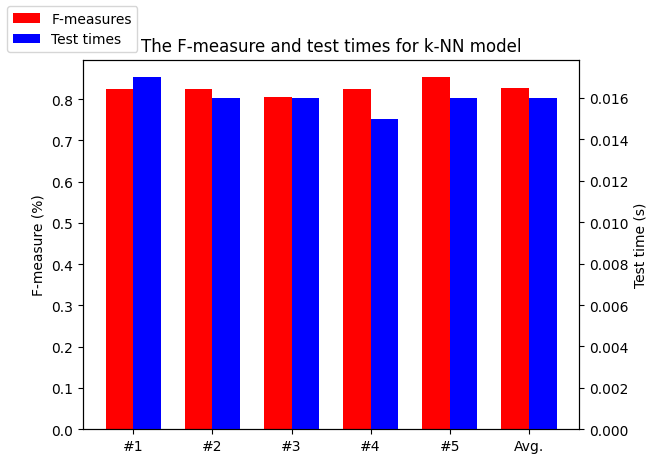

In [15]:
# Plot the F-measure and test times for k-NN model
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, fmeasures_knn, width, label='F-measures', color='red')
rects2 = ax2.bar(x + width/2, times_knn, width, label='Test times', color='blue')
ax.set_ylabel('F-measure (%)')
ax2.set_ylabel('Test time (s)')
ax.set_title('The F-measure and test times for k-NN model')
ax.set_xticks(x, labels)
fig.legend(loc='upper left')
plt.show()

In [16]:
clf = DecisionTreeClassifier()

In [17]:
# Decision Tree
# Perform evaluation 5 times
fmeasures = []
times = []
for i in range(5):
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    start = time.time()
    Y_pred = clf.predict(X_test)
    end = time.time()
    times.append(end - start)
    # Calculate f-measure
    fmeasures.append(f1_score(Y_test, Y_pred, average='macro'))
# Calculate average f-measure
print('F-measure: ', fmeasures)
print('Avg. F-measure: ', fmean(fmeasures))
print('Test times: ', times)
print('Avg test time: ', fmean(times))
fmeasures_tree = fmeasures
fmeasures_tree.append(fmean(fmeasures))
times_tree = times
times_tree.append(fmean(times))

F-measure:  [0.7175724425724427, 0.7429675475652487, 0.7400130875676156, 0.7498459647644976, 0.7519223232534543]
Avg. F-measure:  0.7404642731446518
Test times:  [0.0009999275207519531, 0.0009999275207519531, 0.0010004043579101562, 0.0009992122650146484, 0.0009996891021728516]
Avg test time:  0.0009998321533203126


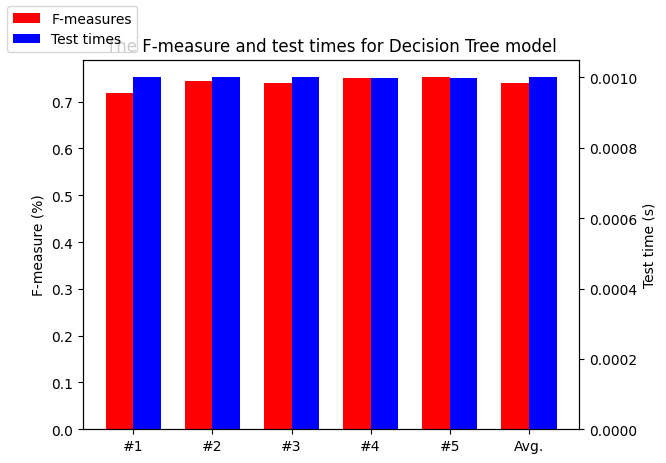

In [18]:
# Plot the F-measure and test times for Decision Tree model
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, fmeasures_tree, width, label='F-measures', color='red')
rects2 = ax2.bar(x + width/2, times_tree, width, label='Test times', color='blue')
ax.set_ylabel('F-measure (%)')
ax2.set_ylabel('Test time (s)')
ax.set_title('The F-measure and test times for Decision Tree model')
ax.set_xticks(x, labels)
fig.legend(loc='upper left')
plt.show()

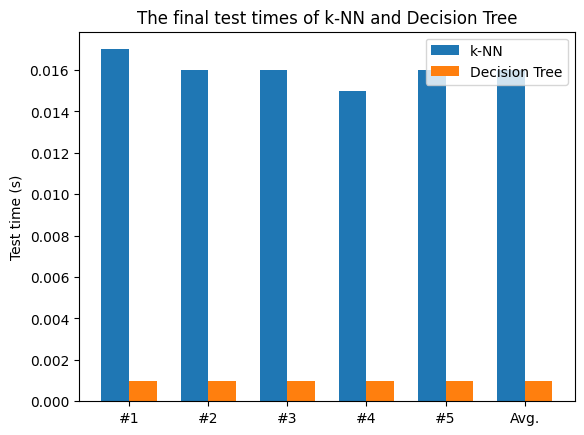

In [19]:
# Compare the final test times of k-NN and Decision Tree
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, times_knn, width, label='k-NN')
rects2 = ax.bar(x + width/2, times_tree, width, label='Decision Tree')
ax.set_ylabel('Test time (s)')
ax.set_title('The final test times of k-NN and Decision Tree')
ax.set_xticks(x, labels)
plt.legend(loc='upper right')
plt.show()

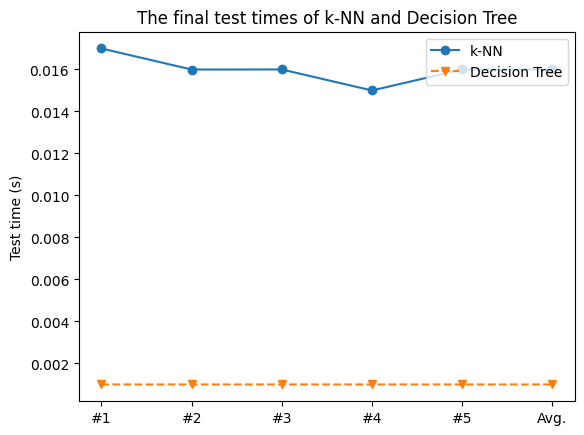

In [20]:
# Compare the final test times of k-NN and Decision Tree
plt.plot(labels, times_knn, 'o-', labels, times_tree, 'v--')
plt.ylabel('Test time (s)')
plt.title('The final test times of k-NN and Decision Tree')
plt.legend(['k-NN', 'Decision Tree'], loc='upper right')
plt.show()

In [21]:
# The plots above show that Decision Tree model has significantly
#   faster test time compared to k-NN model given the same dataset

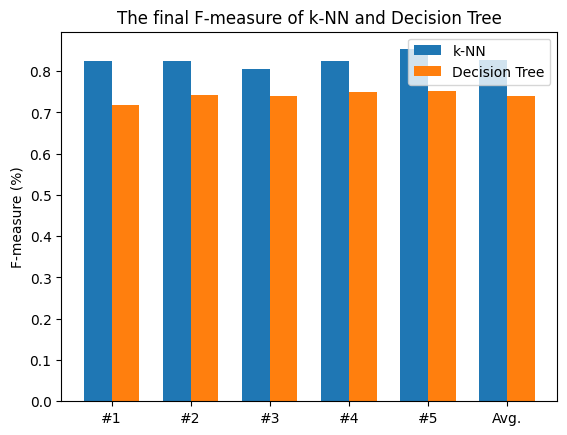

In [22]:
# Compare the final F-measures of k-NN and Decision Tree
labels = ['#1', '#2', '#3', '#4', '#5', 'Avg.']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fmeasures_knn, width, label='k-NN')
rects2 = ax.bar(x + width/2, fmeasures_tree, width, label='Decision Tree')
ax.set_ylabel('F-measure (%)')
ax.set_title('The final F-measure of k-NN and Decision Tree')
ax.set_xticks(x, labels)
plt.legend(loc='upper right')
plt.show()

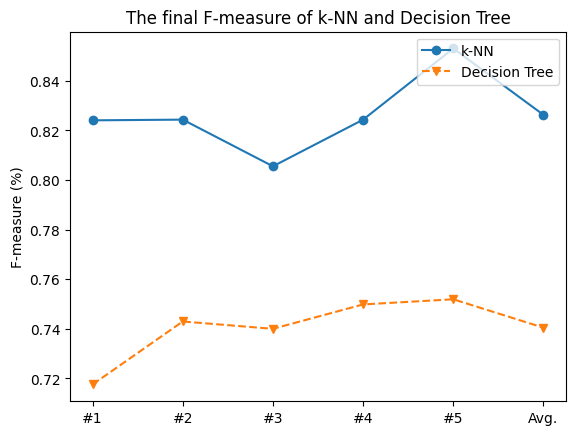

In [23]:
# Compare the final F-measures of k-NN and Decision Tree
plt.plot(labels, fmeasures_knn, 'o-', labels, fmeasures_tree, 'v--')
plt.ylabel('F-measure (%)')
plt.title('The final F-measure of k-NN and Decision Tree')
plt.legend(['k-NN', 'Decision Tree'], loc='upper right')
plt.show()

In [24]:
# The plots above show that Decision Tree model has slightly
#   lower F-measure compared to k-NN model given the same dataset

In [25]:
# Build the k-NN model using the train data set and 
#   select the best k based on F-measure on the validation set
numNeighbors = [1, 2, 3, 4, 5]
fmeasures = []
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Split validation set from training set
    X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    Y_pred = clf.predict(X_val)
    # Calculate f-measure
    fmeasures.append(f1_score(Y_val, Y_pred, average='macro'))
# Calculate average f-measure
print('F-measure: ', fmeasures)
fmeasures_knn = fmeasures

F-measure:  [1.0, 0.8919712675797481, 0.8966643140511975, 0.8928232788759395, 0.862703244160314]


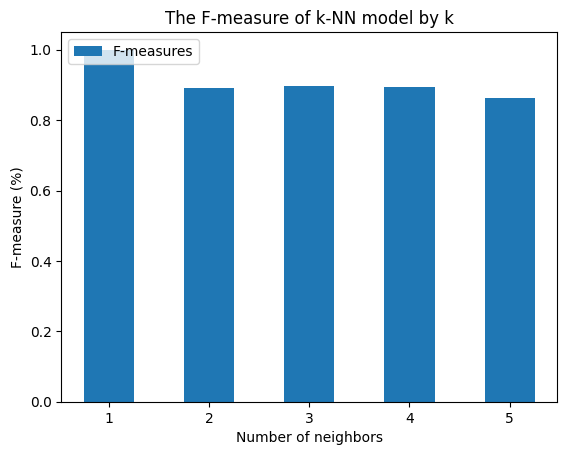

In [26]:
# Plot the F-measure of k-NN model by k
x = np.arange(len(numNeighbors))  # the label locations
fig, ax = plt.subplots()
width = 0.5  # the width of the bars
rect = ax.bar(x, fmeasures_knn, width, label='F-measures')
ax.set_ylabel('F-measure (%)')
ax.set_xlabel('Number of neighbors')
ax.set_title('The F-measure of k-NN model by k')
ax.set_xticks(x, numNeighbors)
ax.legend(loc='upper left')
plt.show()

In [27]:
# Build the Decision Tree model using the train data set and 
#   select the best depth based on F-measure on the validation set
depths = [3, 4, 5, 6, 7, 8, 9, 10]
fmeasures = []
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    # Split the dataset into training set and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    # Split validation set from training set
    X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size=0.1, shuffle=True)
    # Train the model
    clf = clf.fit(X_train, Y_train)
    # Test the model
    Y_pred = clf.predict(X_val)
    # Calculate f-measure
    fmeasures.append(f1_score(Y_val, Y_pred, average='macro'))
# Calculate average f-measure
print('F-measure: ', fmeasures)
fmeasures_tree = fmeasures

F-measure:  [0.7286226318484382, 0.7983722462508701, 0.7919415939173743, 0.8135959803585703, 0.8961291069955403, 0.9159569342892553, 0.9239501542744583, 0.9643588011109981]


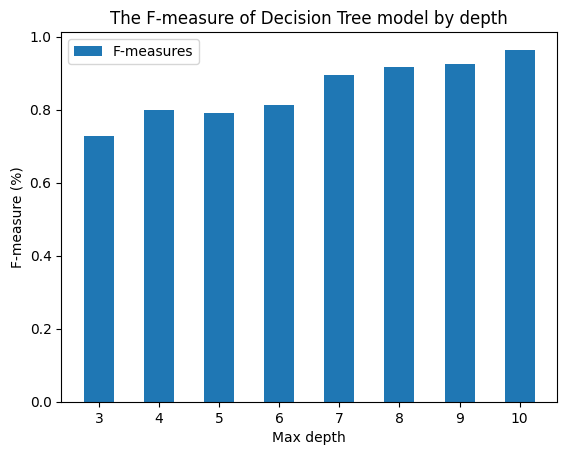

In [28]:
# Plot the F-measure of Decision Tree model by depth
x = np.arange(len(depths))  # the label locations
fig, ax = plt.subplots()
width = 0.5  # the width of the bars
rect = ax.bar(x, fmeasures_tree, width, label='F-measures')
ax.set_ylabel('F-measure (%)')
ax.set_xlabel('Max depth')
ax.set_title('The F-measure of Decision Tree model by depth')
ax.set_xticks(x, depths)
ax.legend(loc='upper left')
plt.show()

Text(0, 0.5, 'F-measure (%)')

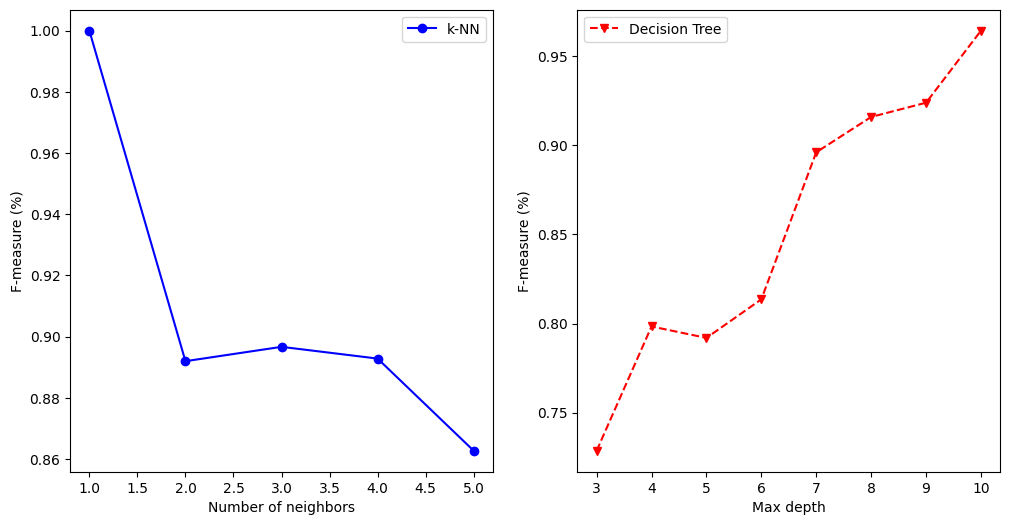

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(numNeighbors, fmeasures_knn, 'bo-')
ax1.legend(['k-NN'])
ax1.set_xlabel('Number of neighbors')
ax1.set_ylabel('F-measure (%)')
ax2.plot(depths, fmeasures_tree,'rv--')
ax2.legend(['Decision Tree'])
ax2.set_xlabel('Max depth')
ax2.set_ylabel('F-measure (%)')

In [30]:
# The plots above show that k-NN and Decision Tree model
#   has opposite behavior
# k-NN decreases in F-measure when the model becomes more
#   complex (increases number of neighbors)
#   -> the best k would be k=1
# Decision Tree increases in F-measure when the model becomes
#   more complex (increases max depths)